# Subreddit Classification: Exploratory Data Analysis - Comments

In [2]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in the Comments Data

In [3]:
# Read in data (do not replace empty strings with NaN)
df = pd.read_csv('../data/comments_clean.csv', na_filter = False)

In [4]:
df.shape

(17476, 3)

In [5]:
df.head(3)

,comment,level,is_serious
0,i wish it didn t overcrowd my feed,1,1
1,my 33yr old sister maced me 29yr old last nigh...,1,1
2,i m concocting an utterly evil prank now all i...,1,1


In [6]:
df['is_serious'].value_counts()

1    9593
0    7883
Name: is_serious, dtype: int64

In [7]:
df['level'].value_counts()

1    11006
2     6470
Name: level, dtype: int64

### Visualize Character & Word Counts

In [9]:
# All Comments
df['char_count'] = df['comment'].map(len)
df['word_count'] = df['comment'].map(lambda x: len(x.split()))
df['avg_word_length'] = df['char_count'] / df['word_count']

In [10]:
df.head()

,comment,level,is_serious,char_count,word_count,avg_word_length
0,i wish it didn t overcrowd my feed,1,1,34,8,4.250000
1,my 33yr old sister maced me 29yr old last nigh...,1,1,237,49,4.836735
2,i m concocting an utterly evil prank now all i...,1,1,76,18,4.222222
3,i am coming to the sad realization that i will...,1,1,396,86,4.604651
4,let s say you re having a discussion with an i...,1,1,749,152,4.927632


In [11]:
# Level 1 Comments dataframe
level1_coms = df[df['level'] == 1][['comment', 'is_serious']]
level1_coms['char_count'] = level1_coms['comment'].map(len)
level1_coms['word_count'] = level1_coms['comment'].map(lambda x: len(x.split()))
level1_coms['avg_word_length'] = level1_coms['char_count'] / level1_coms['word_count']

In [12]:
level1_coms.head(3)

,comment,is_serious,char_count,word_count,avg_word_length
0,i wish it didn t overcrowd my feed,1,34,8,4.250000
1,my 33yr old sister maced me 29yr old last nigh...,1,237,49,4.836735
2,i m concocting an utterly evil prank now all i...,1,76,18,4.222222


In [13]:
# Level 2 Comments dataframe
level2_coms = df[df['level'] == 2][['comment', 'is_serious']]
level2_coms['char_count'] = level2_coms['comment'].map(len)
level2_coms['word_count'] = level2_coms['comment'].map(lambda x: len(x.split()))
level2_coms['avg_word_length'] = level2_coms['char_count'] / level2_coms['word_count']

In [14]:
level2_coms.head(3)

,comment,is_serious,char_count,word_count,avg_word_length
9,just because others put a certain value on som...,1,89,18,4.944444
14,i d like to think so too,1,24,7,3.428571
16,you re welcome,1,14,3,4.666667


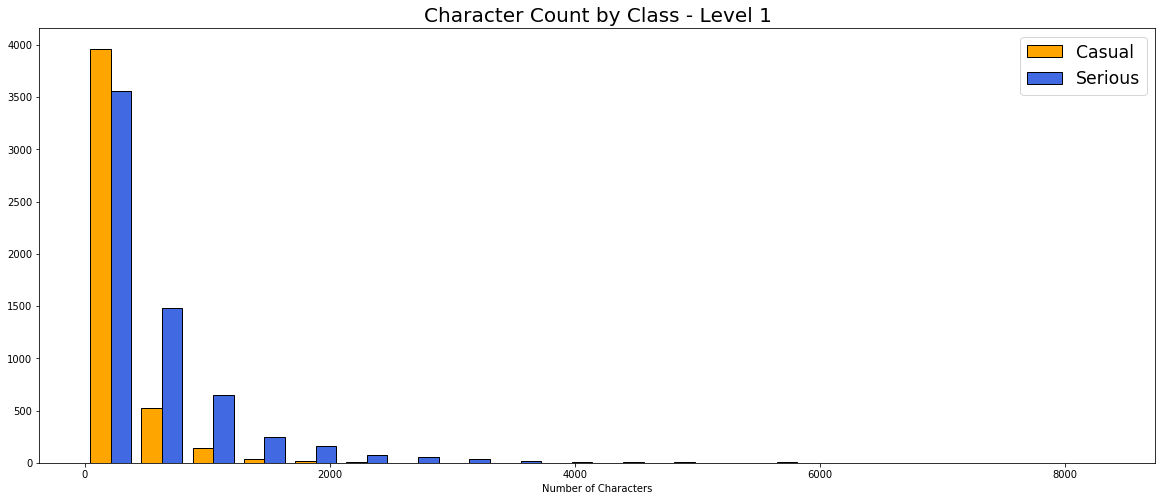

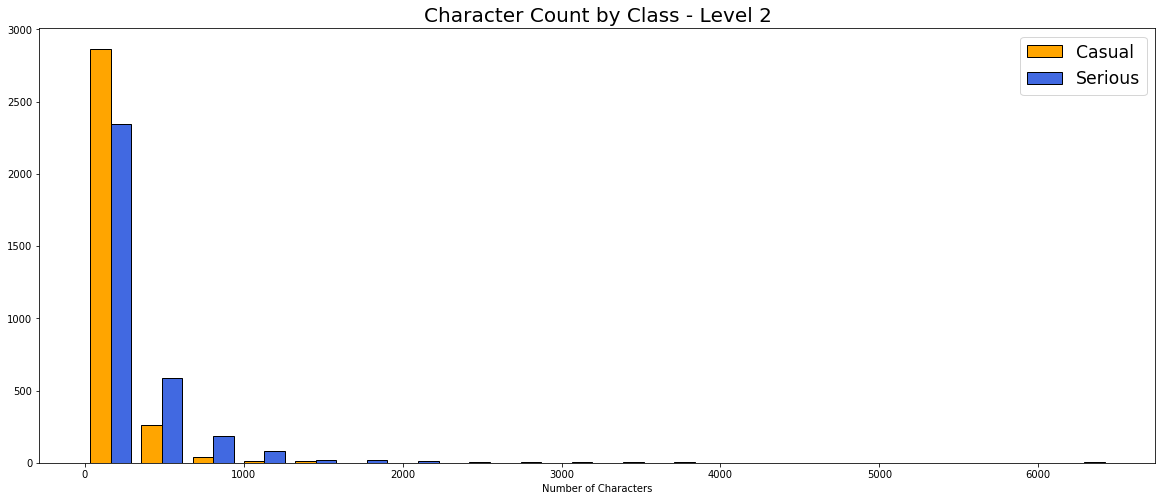

In [15]:
# Reference: code adapted from NLP_EDA in DEN Flex by Sam Stack & Douglas Strodtman

# Look at number of characters in comments by class for each level of comments
# Level 1 = 1st Comment, Level 2 = 1 Reply to 1st Comment
for i, dataframe in enumerate([level1_coms, level2_coms]):
    
    plt.figure(figsize=(20, 8))
    plt.hist([dataframe[dataframe['is_serious']==0]['char_count'], 
              dataframe[dataframe['is_serious']==1]['char_count']],
             bins=20, 
             color=['orange', 'royalblue'], 
             ec='k')
    plt.title(f'Character Count by Class - Level {i+1}', fontsize=20)
    plt.xlabel('Number of Characters')
    plt.legend(['Casual', 'Serious'], fontsize='xx-large')
    plt.show()

Observations:
- Serious comments tend to have longer comments than comments on casual posts (both levels)
- It looks like there is one outlier with over 6,000 characters from the serious reddit in the level 2 comments
- Majority of casual comments are short (falling into the first bucket) (both level)
- Level 2 comments in general appear to be shorter for both subs

In [17]:
# Find average character count
df[['char_count']].mean()

char_count    349.050698
dtype: float64

In [20]:
# Find average character count by subreddit
df[['char_count', 'is_serious']].groupby('is_serious').mean()

,char_count
is_serious,
0,207.469364
1,465.394454


In [21]:
# Find correlation between character count and subreddit 
df[['char_count', 'is_serious']].corr()['is_serious'].sort_values()

char_count    0.261537
is_serious    1.000000
Name: is_serious, dtype: float64

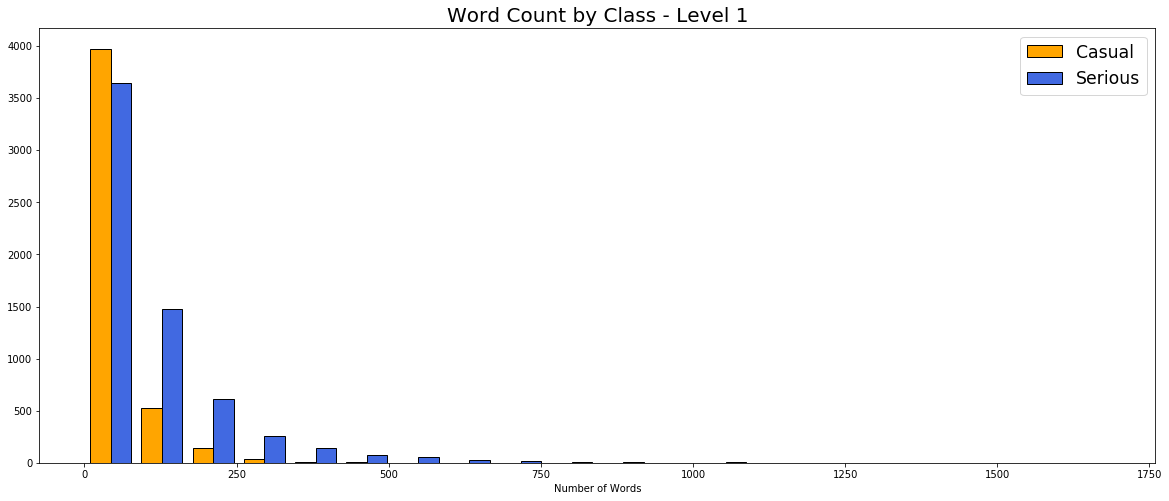

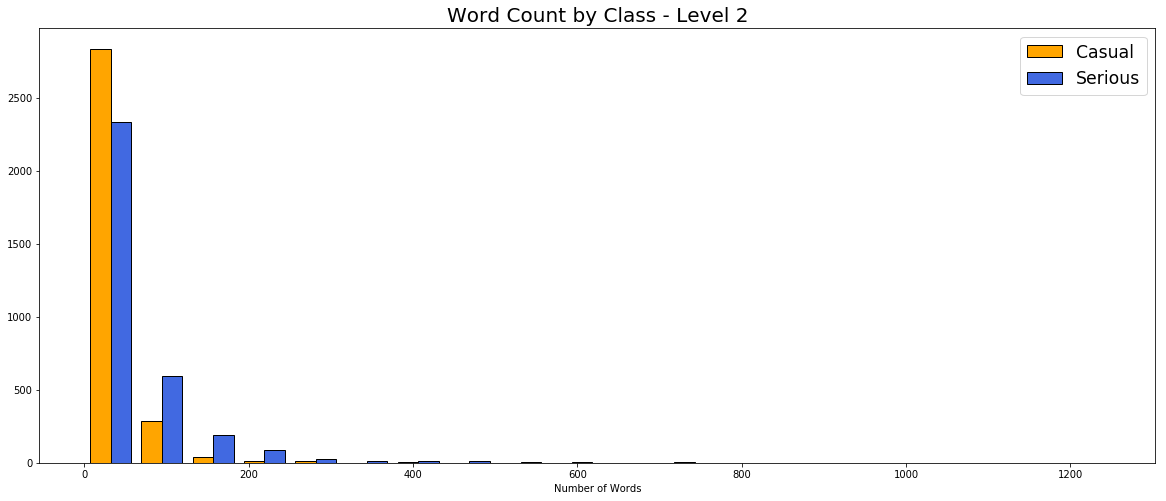

In [13]:
# Look at number of words in comments by class for each level of comments
# Level 1 = 1st Comment, Level 2 = 1 Reply to 1st Comment
for i, dataframe in enumerate([level1_coms, level2_coms]):
    
    plt.figure(figsize=(20, 8))
    plt.hist([dataframe[dataframe['is_serious']==0]['word_count'], 
              dataframe[dataframe['is_serious']==1]['word_count']],
             bins=20, 
             color=['orange', 'royalblue'], 
             ec='k')
    plt.title(f'Word Count by Class - Level {i+1}', fontsize=20)
    plt.xlabel('Number of Words')
    plt.legend(['Casual', 'Serious'], fontsize='xx-large')
    plt.show()

Observations:
- Similar observations to number of characters...for both comment levels serious subs tend to have longer comments than casual subs

In [22]:
# Find average character count
df[['word_count']].mean()

word_count    68.783818
dtype: float64

In [24]:
# Find average character count by subreddit
df[['word_count', 'is_serious']].groupby('is_serious').mean()

,word_count
is_serious,
0,41.887606
1,90.885646


In [25]:
# Find correlation between character count and subreddit 
df[['word_count', 'is_serious']].corr()['is_serious'].sort_values()

word_count    0.258084
is_serious    1.000000
Name: is_serious, dtype: float64

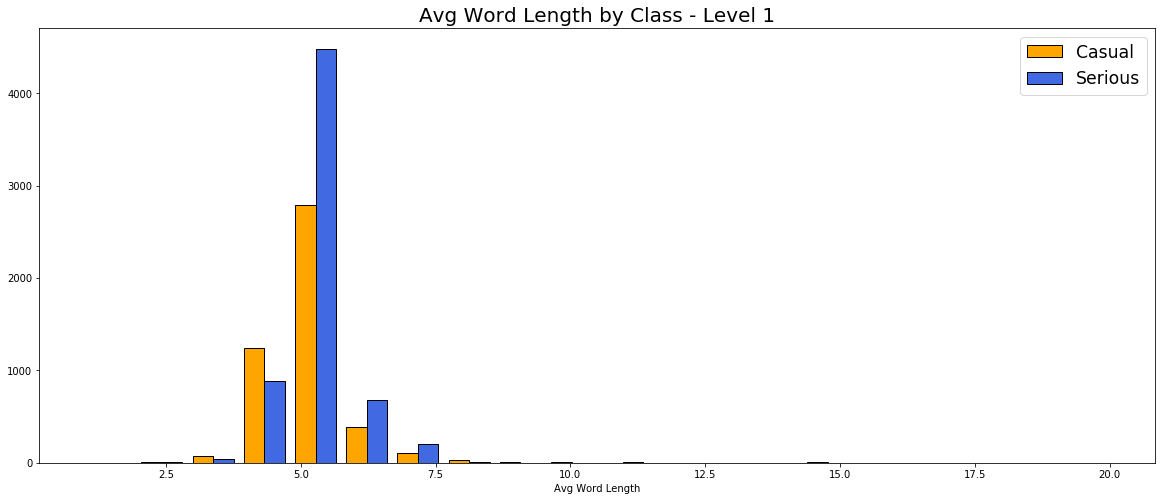

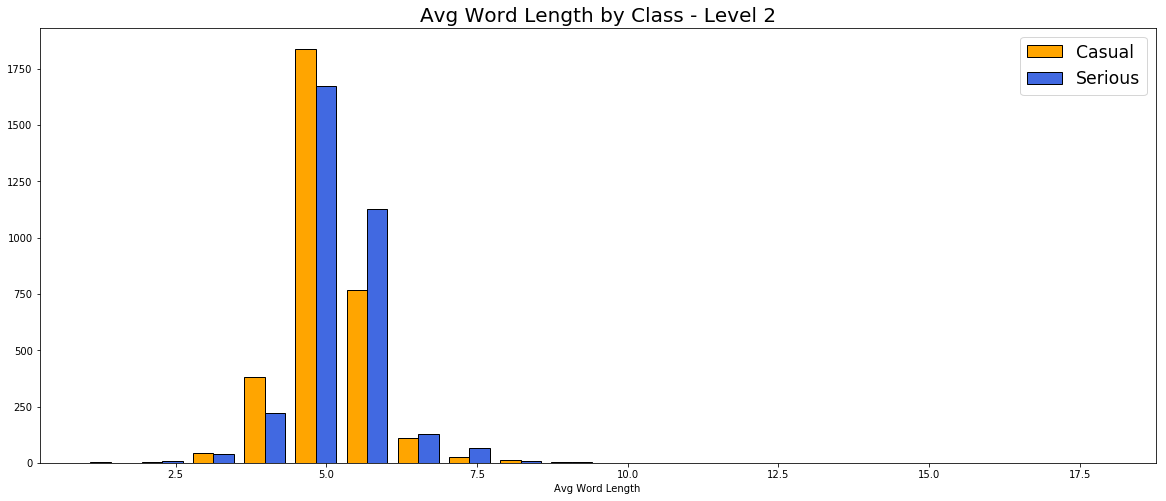

In [14]:
# Look at average word length in comments by class for each level of comments
# Level 1 = 1st Comment, Level 2 = 1 Reply to 1st Comment
for i, dataframe in enumerate([level1_coms, level2_coms]):
    
    plt.figure(figsize=(20, 8))
    plt.hist([dataframe[dataframe['is_serious']==0]['avg_word_length'], 
              dataframe[dataframe['is_serious']==1]['avg_word_length']],
             bins=20, 
             color=['orange', 'royalblue'],
             ec='k')
    plt.title(f'Avg Word Length by Class - Level {i+1}', fontsize=20)
    plt.xlabel('Avg Word Length')
    plt.legend(['Casual', 'Serious'], fontsize='xx-large')
    plt.show();    

Observations:
- The average word length for serious comments is closer to a normal distribution for both levels than casual comments
- Level 1 & 2: average word length for both subs tends to be betweeen 4 and 6
- There are a few outliers where average word length is greater than 12 (both levels)

In [15]:
# Comments where avg_word_length_title is greater than 12
level1_coms[level1_coms['avg_word_length'] > 12]

,comment,is_serious,char_count,word_count,avg_word_length
9890,congratulations,0,15,1,15.0
10443,congratulations,0,15,1,15.0
12131,awesome congratulations,0,25,2,12.5
13087,wooooooooooooooooooo,0,20,1,20.0
13610,congratulations,0,15,1,15.0
15351,congratulations,0,15,1,15.0
15536,congratulations,0,15,1,15.0
16091,congratulations,0,15,1,15.0
16093,congratulations,0,15,1,15.0
16097,congratulations,0,15,1,15.0


Observation: about all of the comments with an average word lengh are simply the word 'congratulations' by itself and they are all from the casual sub

### Lemmatizing & Stemming the Data

In [16]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [17]:
# Funciton to lemmatize a string
def lemmatize_text(raw_text):
    
    # Split and lemmatize
    lem = WordNetLemmatizer()
    text_lemmed = [lem.lemmatize(word) for word in raw_text.split()]

    # Join back together into a string and return
    return(" ".join(text_lemmed))

In [18]:
# Add new lemmatized text columns
df['comment_lem'] = df['comment'].map(lemmatize_text)

In [19]:
print('Before Lemmatizing: ', df['comment'][1])
print('After Lemmatizing:  ', df['comment_lem'][1])

Before Lemmatizing:  my 33yr old sister maced me 29yr old  last night and i have not yet pressed charges  it was one of the most painful experiences i have ever gone through  she also threw my brand new galaxy s10  down the stairs and cut the power cord on my tv
After Lemmatizing:   my 33yr old sister maced me 29yr old last night and i have not yet pressed charge it wa one of the most painful experience i have ever gone through she also threw my brand new galaxy s10 down the stair and cut the power cord on my tv


In [20]:
# Function to stem a string
def stem_text(raw_text):

    # Split and step
    ps = PorterStemmer()
    text_stemmed = [ps.stem(word) for word in raw_text.split()]

    # Join back together into a string and return
    return(" ".join(text_stemmed))

In [21]:
# Add new stemmed text columns
df['comment_stem'] = df['comment'].map(stem_text)

In [22]:
print('Before Stemming: ', df['comment'][1])
print('After Stemming:  ', df['comment_stem'][1])

Before Stemming:  my 33yr old sister maced me 29yr old  last night and i have not yet pressed charges  it was one of the most painful experiences i have ever gone through  she also threw my brand new galaxy s10  down the stairs and cut the power cord on my tv
After Stemming:   my 33yr old sister mace me 29yr old last night and i have not yet press charg it wa one of the most pain experi i have ever gone through she also threw my brand new galaxi s10 down the stair and cut the power cord on my tv


### Count Vectorize Comments

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# Set target
target = df['is_serious']
level = df['level']

In [25]:
# Look at all columns in dataframe
pd.set_option('display.max_columns', 350)

In [26]:
# Reference: code adapted from NLP_EDA in DEN Flex by Sam Stack & Douglas Strodtman

# Create dataframe for all text in comments (lemmed version)
# Instantiate Count Vectorizor (remove english stop words)
# Ignore terms that appear in more than 95% of documents
# Ignore terms that appear in less than 10 documnets
cvec = CountVectorizer(stop_words = 'english', min_df = 10, max_df = 0.95)

# Fit Count Vectorier
all_features = cvec.fit_transform(df['comment_lem'])

# Matrix of words to dataframe
com_words_df = pd.DataFrame(all_features.toarray(), columns = cvec.get_feature_names())

print('Number of Features in Comment Text (Lemmed): ', len(cvec.get_feature_names()))

# Add target and level type to dataframe
com_words_df.insert(0, 'is_serious', target)
com_words_df.insert(1, 'level_type', level)
com_words_df.head()

Number of Features in Comment Text (Lemmed):  4611


,is_serious,level_type,000,10,100,1000,11,12,13,14,15,150,16,17,18,19,1st,20,200,2000,2010,2012,2013,2014,2015,2016,2017,2018,2019,21,22,23,24,25,26,27,28,29,2nd,30,300,32,33,34,35,36,37,3d,3rd,40,45,4th,50,500,5k,60,65,70,75,7th,80,800,90,99,abandon,abandoned,ability,able,abnormal,abortion,abroad,absence,absolute,absolutely,abstract,absurd,abuse,abused,abuser,abusing,abusive,academia,academic,accent,accept,acceptable,acceptance,accepted,accepting,access,accessible,accident,accidentally,accomplish,accomplished,accomplishment,according,accordingly,account,accountable,accounting,accurate,accurately,accusation,accused,achieve,achieved,achievement,achieving,acknowledge,acknowledging,acquaintance,acquired,act,acted,acting,action,active,actively,activist,activity,actor,actual,actually,ad,adapt,add,added,addict,addicted,addiction,addictive,adding,addition,additional,additionally,address,addressed,addressing,adhd,adjust,adjusted,admire,admit,admitted,admitting,adopt,adopted,adoption,adorable,adore,adult,adulthood,advance,advanced,advancement,advantage,adventure,adverse,advertising,advice,advise,advisor,advocate,af,affair,affect,affected,affecting,affection,afford,affordable,afraid,africa,african,...,voted,voter,voting,vulnerable,wa,wage,wait,waited,waiting,wake,waking,walk,walked,walking,wall,walmart,wanna,want,wanted,wanting,war,warm,warmer,warming,warned,warning,wary,wash,washing,wasn,waste,wasted,wasting,watch,watched,watching,water,watt,wave,way,weak,weakness,wealth,wealthy,weapon,wear,wearing,weather,web,website,wedding,wednesday,weed,week,weekend,weekly,weigh,weight,weird,weirdo,welcome,went,weren,west,western,whatnot,whats,whatsoever,wheat,wheel,whilst,white,wholesome,wide,widely,wider,wife,wiki,wikipedia,wild,wildlife,wildly,willing,willingly,willingness,win,wind,window,wine,wing,winning,winter,wipe,wired,wisdom,wise,wish,wished,wishing,withdrawal,witness,woke,woman,won,wonder,wondered,wonderful,wondering,wont,wood,word,wording,work,worked,worker,working,workout,workplace,world,worldview,worn,worried,worry,worrying,worse,worst,worth,worthless,worthwhile,worthy,wouldn,wouldnt,wound,wow,wrap,wrapped,wreck,write,writer,writing,written,wrong,wrote,wtf,www,x200b,xd,ya,yard,yay,yea,yeah,year,yellow,yep,yes,yesterday,yikes,yo,yoga,york,young,younger,youngest,youre,youth,youtu,youtube,youtuber,yup,zed,zee,zero,zone,zoo
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Observation: Some years 2000-2020 appear as columns (making these assumptions that the numbers represent years)


### Look at Word Frequency in Comments

In [27]:
# Reference: code adapted from NLP_EDA in DEN Flex by Sam Stack & Douglas Strodtman

# Create a dataframe with every word feature and the number of times that word appears in our title data
com_word_counts = {column : com_words_df[column].sum() for column in com_words_df.columns[2:]}
cwc = pd.DataFrame(com_word_counts, index = ['counts']).T

# View sorted
cwc.sort_values(by = 'counts', ascending = False).head(15)

,counts
like,6352
people,6350
just,6307
wa,6108
don,4976
thing,4365
time,3931
think,3881
life,3592
really,3353


Observation: There is over a 3,000 count difference between the top word and the bottom words 

In [28]:
# Taking the top 15 most appearing words and put them in a list and add 'target' to the list
top15 = list(cwc.sort_values(by = 'counts', ascending = False).head(15).index)
top15.append('is_serious')

# Taking words 15 through 30 of most occuring words
next_15 = list(cwc.sort_values(by = 'counts', ascending = False).iloc[15:30].index)
next_15.append('is_serious')

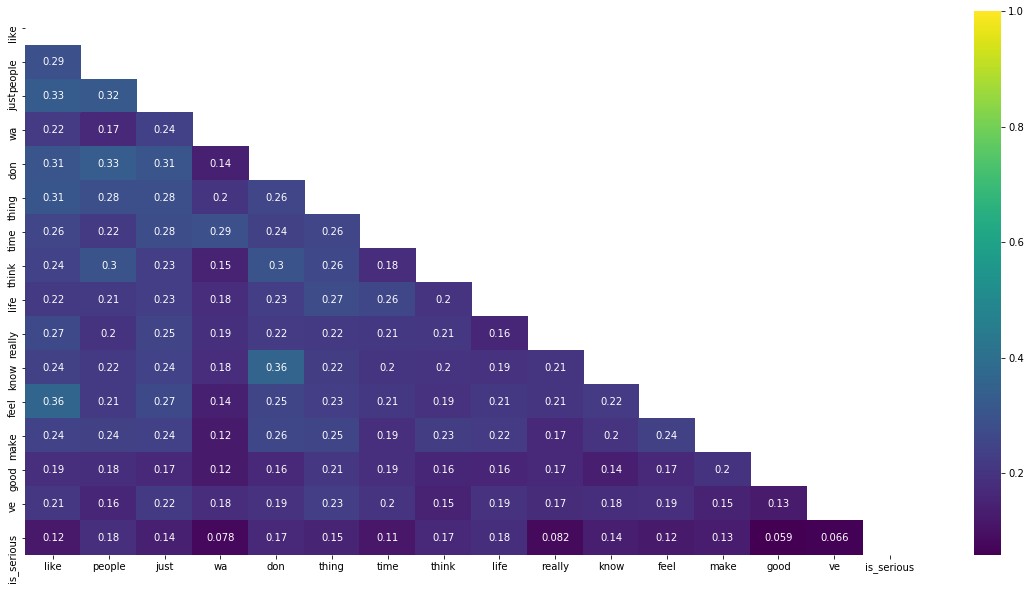

In [29]:
# Looking at the top 15 words that occur and their correlation to the target as well as other top words
plt.figure(figsize = (20,10))

corr = com_words_df[top15].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask = mask, cmap='viridis', annot = True);

Observations:
- 'don' and 'know' have a relatively high postiive correlation (0.36)...assuming "don't know"
- 'like' and 'feel' have a relateively high postiive correlation (0.36)...assuming "feel like"
- 'people' and 'think' have a relatively high postive correlation (0.3)...assuming "people think"
- 'don' and 'think' have a relatively high positive correlation (0.3)...assuming "don't think"

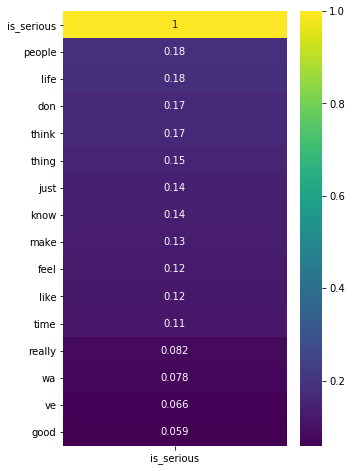

In [30]:
# Looking at the top 15 words that occur and their correlation to just the target (is_serious)
plt.figure(figsize=(5,8))
sns.heatmap(com_words_df[top15].corr()[['is_serious']].sort_values('is_serious', ascending=False),
            annot=True, cmap='viridis');

Observations:
- 'people', 'life', 'don' and 'think' are the highest correlated comment words to serious (>0.17)
- 'good' and 've' (...maybe 'very' before lemmatizing) are the lowest correlated comment words to casual

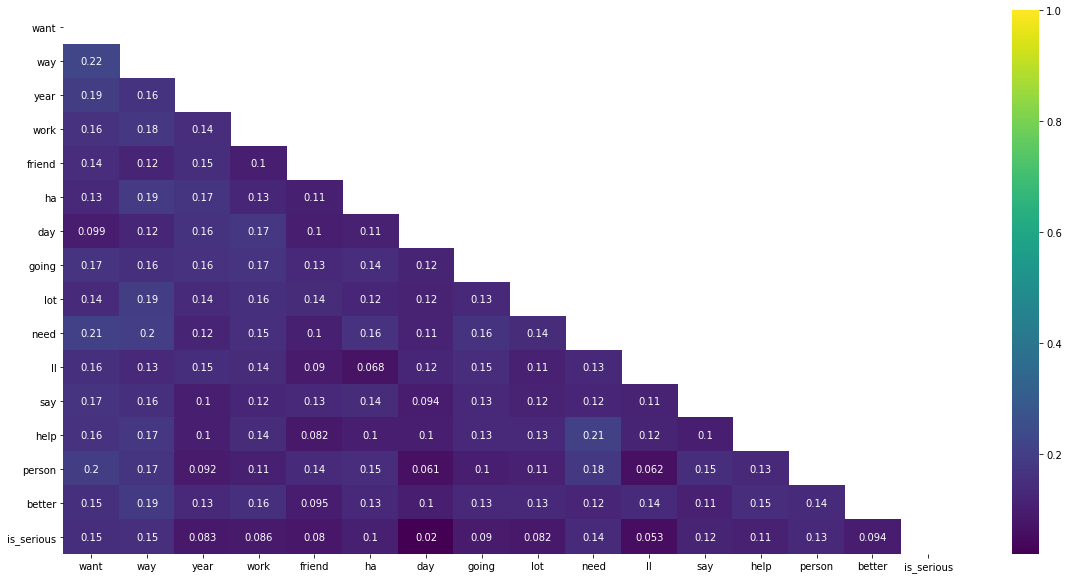

In [31]:
# Looking at the top 15 words that occur and their correlation to the target as well as other top words
plt.figure(figsize = (20,10))

corr = com_words_df[next_15].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask = mask, cmap='viridis', annot = True);

Observations:
- 'need' and 'help' have a relatively high postiive correlation (0.21)...assuming "need help"
- 'want' and 'need' have a relateively high postiive correlation (0.21)
- 'want' and 'way' have a relatively high postive correlation (0.22)

**Identify Most and Least Correlated Words with Target (Serious)**

In [43]:
# Least correlated with target = 1 (aka correlated with casual)
top1000 = list(cwc.sort_values(by = 'counts', ascending = False).head(1000).index)
top1000.append('is_serious')
com_words_df[top1000].corr().sort_values(by = 'is_serious')['is_serious'].head(20)

haha             -0.078724
lol              -0.078610
congrats         -0.075426
song             -0.064633
cat              -0.061583
favorite         -0.060232
congratulation   -0.056102
awesome          -0.048617
taste            -0.047322
music            -0.047075
excited          -0.040679
cool             -0.039567
water            -0.034550
oh               -0.033745
blue             -0.033431
rock             -0.031620
store            -0.030151
lately           -0.029862
morning          -0.027598
nice             -0.026987
Name: is_serious, dtype: float64

Words Correlated with Casual (Target = 0):
- 'haha'
- 'lol'
- 'congrats'
- 'song'
- 'cat'
- 'favorite'

In [44]:
# Most correlated with target = 1 (aka correlated with serious)
top1000 = list(cwc.sort_values(by = 'counts', ascending = False).head(1000).index)
top1000.append('is_serious')
com_words_df[top1000].corr().sort_values(by = 'is_serious', ascending=False)['is_serious'].head(20)

is_serious    1.000000
people        0.184722
life          0.180445
don           0.168747
think         0.165610
way           0.153385
thing         0.152251
want          0.146586
just          0.143481
know          0.137776
need          0.136530
make          0.134574
person        0.127461
feel          0.122634
like          0.120491
doesn         0.117968
say           0.117933
problem       0.115972
time          0.114257
issue         0.113128
Name: is_serious, dtype: float64

Words Correlated with Casual (Target = 0):
- 'people'
- 'life'
- 'don'
- 'think'
- 'way'
- 'thing'

In [76]:
# Find list of top 200 terms from each class
top_words_casual = list(com_words_df.groupby('is_serious').
    mean().T.sort_values(0, ascending=False).head(200).index)

top_words_serious = list(com_words_df.groupby('is_serious').
     mean().T.sort_values(1, ascending=False).head(200).index)

In [58]:
# Look at words that overlap
top_words_overlap = [serious for serious in top_words_serious if serious in top_words_casual]

Conduct a hypothesis test on this.

$H_0$: The subreddits for serious and casual have the same mean frequency for word $x$.

$H_A$: The subreddits for serious and casual have a different mean frequency for word $x$.

We'll set our alpha at .05

In [59]:
from scipy.stats import ttest_ind

In [60]:
# Reference: code adapted from NLP_EDA in DEN Flex by Sam Stack & Douglas Strodtman

# Store P-Value, tstat and word
ttest_dict = {}

for word in top_words_overlap:
    ttest_dict[word] = ttest_ind(com_words_df[com_words_df['is_serious']==1][word], 
         com_words_df[com_words_df['is_serious']==0][word])

In [61]:
# All words with pvalue less than 0.05
# These are significant (shouldn't remove)
{word : '{:0.7f}'.format(test.pvalue)
     for word, test in ttest_dict.items() if test.pvalue < 0.05 }

{'level_type': '0.0000000',
 'people': '0.0000000',
 'just': '0.0000000',
 'like': '0.0000000',
 'wa': '0.0000000',
 'don': '0.0000000',
 'thing': '0.0000000',
 'life': '0.0000000',
 'think': '0.0000000',
 'time': '0.0000000',
 'know': '0.0000000',
 'feel': '0.0000000',
 'want': '0.0000000',
 'really': '0.0000000',
 'make': '0.0000000',
 'way': '0.0000000',
 've': '0.0000000',
 'good': '0.0000000',
 'year': '0.0000000',
 'work': '0.0000000',
 'friend': '0.0000000',
 'need': '0.0000000',
 'ha': '0.0000000',
 'going': '0.0000000',
 'lot': '0.0000000',
 'say': '0.0000000',
 'person': '0.0000000',
 'help': '0.0000000',
 'better': '0.0000000',
 'day': '0.0073633',
 'right': '0.0000000',
 'll': '0.0000000',
 'job': '0.0000000',
 'amp': '0.0000000',
 'try': '0.0000000',
 'doesn': '0.0000000',
 'best': '0.0000000',
 'did': '0.0000000',
 'doing': '0.0000000',
 'bad': '0.0000000',
 'mean': '0.0000000',
 'world': '0.0000000',
 'come': '0.0000000',
 'thought': '0.0000000',
 'maybe': '0.0000000',
 

In [62]:
# Words that are not significant (can remove)
{word : '{:0.7f}'.format(test.pvalue)
     for word, test in ttest_dict.items() if test.pvalue >= 0.05 }

{'love': '0.4280398',
 'got': '0.3471970',
 'pretty': '0.0534273',
 'great': '0.2769797',
 'http': '0.9467390',
 'stuff': '0.0533700',
 'definitely': '0.2688198',
 'went': '0.0645095',
 'week': '0.7983824',
 'thanks': '0.0648627',
 'enjoy': '0.3813607',
 'reddit': '0.1300777',
 'www': '0.1012858',
 'hour': '0.1358993'}

In [63]:
# List of overlapping words to remove
remove_words = {word : '{:0.7f}'.format(test.pvalue) 
                for word, test in ttest_dict.items() if test.pvalue >= 0.05 }.keys()
remove_words

### Sentiment Analysis by Class

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [67]:
sia = SentimentIntensityAnalyzer()

In [69]:
dicts = []

for st in df['comment']:
    scores = sia.polarity_scores(st)  
    scores['text'] = st
    dicts.append(scores)

In [70]:
df_sent = pd.DataFrame(dicts)
df_sent['target'] = target

In [71]:
df_sent.head()

,compound,neg,neu,pos,text,target
0,0.4019,0.000,0.649,0.351,i wish it didn t overcrowd my feed,1
1,-0.5391,0.104,0.861,0.035,my 33yr old sister maced me 29yr old last nig...,1
2,-0.3597,0.236,0.603,0.161,i m concocting an utterly evil prank now all ...,1
3,0.9252,0.071,0.720,0.209,i am coming to the sad realization that i will...,1
4,-0.7236,0.160,0.723,0.118,let s say you re having a discussion with an i...,1


In [73]:
df_sent.groupby(by='target').mean()

,compound,neg,neu,pos
target,,,,
0,0.360934,0.061978,0.737103,0.200410
1,0.222522,0.093307,0.750947,0.155744


Observations:
- target = 0 (casual): 0.20 postive, 0.06 negative, 0.73 neutral
- target = 1 (serious): 0.15 positive, 0.09 negative, 0.75 neutral
- While both have strong neutral scores, the casual conversation has a stronger postiive score and the serious conversation has a stronger negative score which is expected

In [77]:
# Correlation with target
df_sent.corr()[['target']]

,target
compound,-0.117638
neg,0.153122
neu,0.040246
pos,-0.135117
target,1.000000


Observation:
- 'pos' is negatively correlated with the target (serious convos) (-0.135)
- 'neg' is positively correlated with the target (0.153)